In [1]:
import os
import re
import matplotlib
import imageio
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import signal
import numpy as np 
import pandas as pd
import seaborn as sns
plt.style.use('seaborn-darkgrid')

In [2]:
files1 = {os.path.splitext(k)[0]: {} for k in os.listdir('data') if '.csv' in os.path.splitext(k)[1]}
files2 = {os.path.splitext(k)[0]: {} for k in os.listdir('data/FCandFRECS') if '.csv' in os.path.splitext(k)[1]}


for i,file in enumerate(os.listdir('data')):
    ext = os.path.splitext(file)[1]
    name = os.path.splitext(file)[0]
    if '.csv' in ext:
        df = pd.read_csv(f'data/{file}')
        files1[name] = df

for i,file in enumerate(os.listdir('data/FCandFRECS')):
    ext = os.path.splitext(file)[1]
    name = os.path.splitext(file)[0]
    if '.csv' in ext:
        df = pd.read_csv(f'data/FCandFRECS/{file}')
        files2[name] = df

print(files1.keys())
amps=np.array(files1['Amps']['amp'])
Xa=np.array(files1['Amps']['X'])
Ya=np.array(files1['Amps']['Y'])
f22=np.array(files1['22']['frecs'])
X22=np.array(files1['22']['X'])
Y22=np.array(files1['22']['Y'])


print(files2.keys())
f=np.array(files2['0']['frecs'])
X=[]
Y=[]
for i in range(10):
    X.append(np.array(files2['{}'.format(i)]['X']))
    Y.append(np.array(files2['{}'.format(i)]['Y']))

dict_keys(['22', 'Amps', 'Error22'])
dict_keys(['3', '9', '6', '7', '4', '5', '2', '8', '0', '1'])


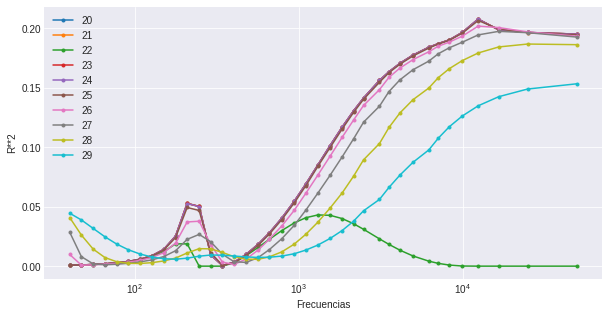

In [19]:
%matplotlib inline
plt.figure(figsize=(10,5))
for i in range(10):
    plt.semilogx(1e9/(f*2520*8),X[i]**2+Y[i]**2,'.-',label='{}'.format(20+i))
plt.xlabel('Frecuencias')
plt.ylabel('R**2')
plt.legend()

0.0001409833686238926
7.701076680532298e-05
0.00010926530890741082


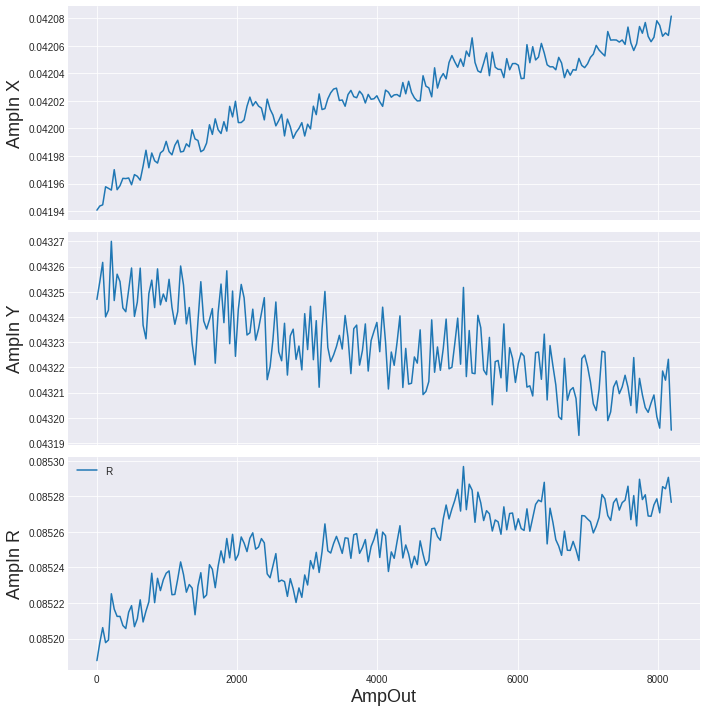

In [53]:
%matplotlib inline
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(10,10),sharex=True)
ax1.plot(amps,Xa**2,label='EEE')
ax2.plot(amps,Ya**2,label='Careta')
ax3.plot(amps,Xa**2+Ya**2,label='R')
ax1.set_ylabel('AmpIn X',fontsize=18)
ax2.set_ylabel('AmpIn Y',fontsize=18)
ax3.set_ylabel('AmpIn R',fontsize=18)
ax3.set_xlabel('AmpOut',fontsize=18)
fig.tight_layout()
plt.legend()
print(max(Xa**2)-min(Xa**2))
print(max(Ya**2)-min(Ya**2))
print(max(Xa**2+Ya**2)-min(Xa**2+Ya**2))

In [8]:
f22=np.array(files1['22']['frecs'])
X22=np.array(files1['22']['X'])
Y22=np.array(files1['22']['Y'])

In [7]:
%matplotlib qt
plt.figure(figsize=(10,5))
plt.semilogx(1/( (f22+1) * 120 * 8e-9 ),Y22,'.-',label='R'.format(i))
plt.xlabel('Frecuencias')
plt.ylabel('R**2')
plt.legend()

In [10]:
fe=np.array(files1['Error22']['frecs'])
Xe=np.array(files1['Error22']['X'])
Ye=np.array(files1['Error22']['Y'])
Re=np.array(files1['Error22']['R'])
ph=np.array(files1['Error22']['ph'])

In [20]:
%matplotlib inline
plt.figure(figsize=(10,5))
plt.semilogx(1/( (fe+1) * 120 * 8e-9 ) ,Re**2,'.-',label='R')
plt.semilogx(1/( (fe+1) * 120 * 8e-9 ),Xe**2,'.-',label='X')
plt.semilogx(1/( (fe+1) * 120 * 8e-9 ),Ye**2,'.-',label='Y')
plt.xlabel('Frecuencias')
plt.ylabel('V')
plt.legend()

In [10]:
plt.semilogx(1e9/(f*2520*8),X[2],'.-',label='{}'.format(20+2))